# Nashville Airbnb Rentals Exploratory Data Analysis

## Import Necessary Libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopy.distance as gd
import plotly.express as px
import folium
from branca.colormap import linear, LinearColormap

## Import and Load Nashville Airbnb Data

In [19]:
listings =  pd.read_csv('C:/Users/Datasets/NashvilleRentals/Listings.csv')
reviews = pd.read_csv('C:/Users/Datasets/NashvilleRentals/Reviews.csv')

print(f"The listings dataset has {listings.shape[0]} rows and {listings.shape[1]} columns.")
print(f"The reviews dataset has {reviews.shape[0]} rows and {reviews.shape[1]} columns.")

The listings dataset has 8951 rows and 18 columns.
The reviews dataset has 649154 rows and 2 columns.


## Inspect, Create Features and Clean the Listings Dataset 

In [38]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8951 entries, 0 to 8950
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8951 non-null   int64  
 1   name                            8951 non-null   object 
 2   host_id                         8951 non-null   int64  
 3   host_name                       8951 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8951 non-null   object 
 6   latitude                        8951 non-null   float64
 7   longitude                       8951 non-null   float64
 8   room_type                       8951 non-null   object 
 9   price                           6569 non-null   float64
 10  minimum_nights                  8951 non-null   int64  
 11  number_of_reviews               8951 non-null   int64  
 12  last_review                     77

In [33]:
 # Create Rental Listing Distance From Airport and Nashville City Center
downtown_nashville = (36.165890, -86.784440)  
airport_nashville = (36.131687, -86.668823)
listings["downtown_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), downtown_nashville).miles, axis=1)
listings["airport_distance"] = listings.apply(lambda x:gd.distance((x["latitude"], x["longitude"]), airport_nashville).miles, axis=1)

## What the Data Says for Customers (Renters)

In [67]:
# Number of Available Listings in the Nashville Airbnb Ecosystem
print(f"There are {listings.id.nunique()} unique Airbnb rental listings in Nashville, TN")

There are 8951 unique Airbnb rental listings in Nashville, TN


In [84]:
# Average and Median Rental Listing Price Per Night in the  Nashville Airbnb Ecosystem
avg = listings.price.mean()
med = listings.price.median()
low = listings.price.min()
high = listings.price.max()
print(f"In Nashville, TN, nightly Airbnb rental prices could be as low as ${round(low)} and as high as ${round(high)}. Furthermore, the average nightly price of an Airbnb rental listing is ${round(avg)}, while its median is around ${round(med)}")

In Nashville, TN, Airbnb rental prices could be as low as $19 and as high as $4163. Furthermore, the average nightly price of an Airbnb rental listing is $197, while its median is around $158


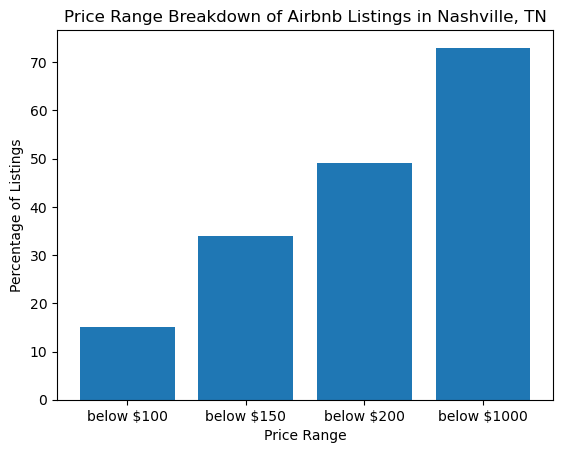

In [142]:
# Price Categories  
below_100 = (len(listings[listings.price < 100])/len(listings.price))*100
below_150 = (len(listings[listings.price < 150])/len(listings.price))*100
below_200 = (len(listings[listings.price < 200])/len(listings.price))*100
below_1000 = (len(listings[listings.price < 1000])/len(listings.price))*100
price_ranges = {'Under $100': round(below_100), 'Under $150': round(below_150), 'Under $200': round(below_200), 'Under $1000': round(below_1000)}

# Price Range Breakdown of Airbnb Listings in Nashville, TN
plt.bar((price_ranges.keys()), list(price_ranges.values()), align='center')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Listings')
plt.title("Price Range Breakdown of Airbnb Listings in Nashville, TN");

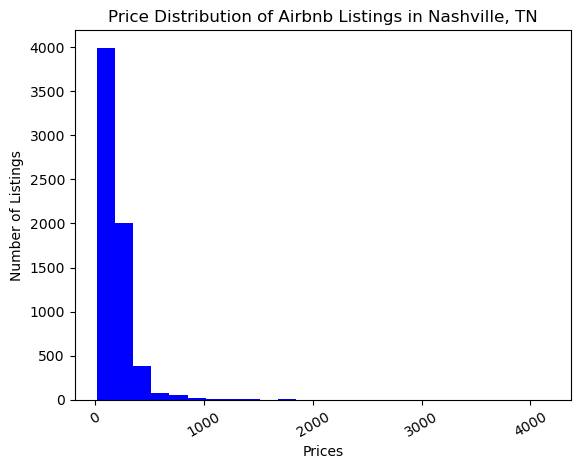

In [179]:
# Price Distribution of Airbnb Listings in Nashville, TN
plt.hist(data = listings, x = 'price', color = 'blue', bins = 25)
plt.xlabel('Prices')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Price Distribution of Airbnb Listings in Nashville, TN");

In [50]:
# Prevalent Listing Types in the Nashville Airbnb Ecosystem
listings.room_type.value_counts(normalize=True)

room_type
Entire home/apt    0.898447
Private room       0.098425
Hotel room         0.002458
Shared room        0.000670
Name: proportion, dtype: float64

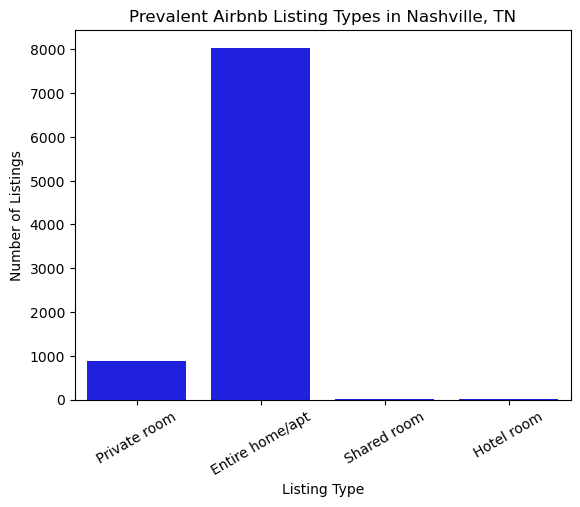

In [51]:
sns.countplot(data=listings,x='room_type', color = 'blue')
plt.xlabel('Listing Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=30)
plt.title("Prevalent Airbnb Listing Types in Nashville, TN");

In [172]:
short_term = len(listings[listings.minimum_nights < 30])
long_term = len(listings[listings.minimum_nights > 30])
rental_type = [short_term, long_term]
print(f"In the Nashville Airbnb ecosystem, just {round((long_term/(long_term+short_term)) * 100 , 2)}% of listings provide long-term rentals while {round((short_term/(long_term+short_term)) * 100, 2)} of listings provide short-term stays.")
print(f"Averagely, Nashville Airbnb listings have a minimum nights booking requirement of {round(listings.minimum_nights.mean())} nights, indicating that an average listing would offer short-term rental options")

In the Nashville Airbnb ecosystem, just 1.62% of listings provide long-term rentals while 98.38 of listings provide short-term stays.
Averagely, Nashville Airbnb listings have a minimum nights booking requirement of 6 nights, indicating that an average listing would offer short-term rental options


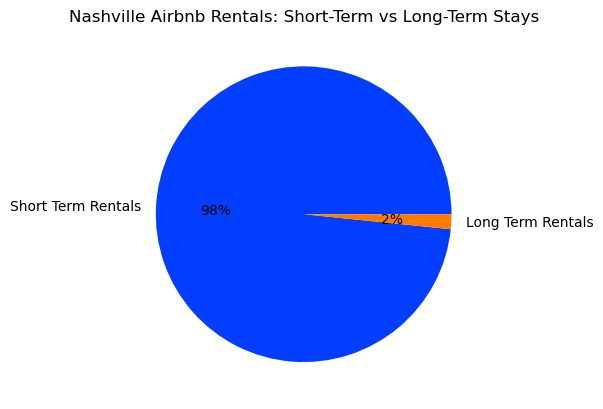

In [170]:
color = sns.color_palette('bright') 
plt.pie(rental_type, labels=['Short Term Rentals','Long Term Rentals'], colors=color, autopct='%.0f%%')
plt.title('Nashville Airbnb Rentals: Short-Term vs Long-Term Stays')
plt.show() 